In [5]:
! pip install backtrader
! pip install yfinance
! pip install pyfolio
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import backtrader as bt
import pyfolio as pf
import datetime as dt
import pandas_datareader.data as web

     ---------------------------------------- 91.1/91.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 52.8/52.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 109.5/109.5 kB 3.2 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88691 sha256=e9e7e574f1cb11fc4216f25b326a5285db36bc43c7ab69ff69f61c9c0147569b
  Stored in directory: c:\users\deel\appdata\local\pip\cache\wheels\24\0d\1f\8b712eded61e2d5c164323efa9cacf923cde0bf70408e1acec
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39786 sha256=9356bfde0a5179f2b36e26cc44e16a9c4a761ce136eaebedd8ecfce416425f33
  Stored in directory: c:\users\deel\appdata\local\pip\cache\wheels\36\32\69\06f75dbcc8a1a3a8dc6b5fa80ead9c221a0331c931a

C:\Users\DEEL\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [6]:
_start = dt.date(2015,1,2)
_end = dt.date(2020,4,30)
ticker = 'MSFT'
df = yf.download(ticker, start = _start, end = _end)

[*********************100%***********************]  1 of 1 completed


In [7]:
df['bnh_returns'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
df.head(3)

Price,Adj Close,Close,High,Low,Open,Volume,bnh_returns
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,
Date,,,,,,,
2015-01-02 00:00:00+00:00,40.232857,46.759998,47.419998,46.540001,46.660000,27913900,NaN
2015-01-05 00:00:00+00:00,39.862881,46.330002,46.730000,46.250000,46.369999,39673900,-0.009238
2015-01-06 00:00:00+00:00,39.277798,45.650002,46.750000,45.540001,46.380001,36447900,-0.014786


In [8]:
# Calculate Short and Long EMAs
short_ema = 20
long_ema = 50
df['EMA_20'] = df['Adj Close'].ewm(span=short_ema, adjust=False).mean()
df['EMA_50'] = df['Adj Close'].ewm(span=long_ema, adjust=False).mean()

# Define Buy and Sell signals
df['Signal'] = 0  # Default to 0
df['Signal'] = np.where(df['EMA_20'] > df['EMA_50'], 1, 0)  # 1 = Buy, 0 = Sell

# Create a Position column that tracks the trading position
df['Position'] = df['Signal'].shift(1)  # Use previous day's signal for today's position

# Calculate Strategy Returns based on Position
df['strategy_returns'] = df['Position'] * df['bnh_returns']

# Calculate Cumulative Returns for both Buy-and-Hold and Strategy
df['cumulative_bnh_returns'] = df['bnh_returns'].cumsum().apply(np.exp)  # Buy-and-hold cumulative
df['cumulative_strategy_returns'] = df['strategy_returns'].cumsum().apply(np.exp)  # Strategy cumulative

# Display the first few rows to confirm calculations
df[['Adj Close', 'EMA_20', 'EMA_50', 'Signal', 'Position', 'bnh_returns', 'strategy_returns', 
    'cumulative_bnh_returns', 'cumulative_strategy_returns']].head(10)

Price,Adj Close,EMA_20,EMA_50,Signal,Position,bnh_returns,strategy_returns,cumulative_bnh_returns,cumulative_strategy_returns
Ticker,MSFT,,,,,,,,
Date,,,,,,,,,
2015-01-02 00:00:00+00:00,40.232857,40.232857,40.232857,0,NaN,NaN,NaN,NaN,NaN
2015-01-05 00:00:00+00:00,39.862881,40.197621,40.218348,0,0.0,-0.009238,-0.0,0.990804,1.0
2015-01-06 00:00:00+00:00,39.277798,40.110019,40.181464,0,0.0,-0.014786,-0.0,0.976262,1.0
2015-01-07 00:00:00+00:00,39.776836,40.078287,40.165596,0,0.0,0.012625,0.0,0.988665,1.0
2015-01-08 00:00:00+00:00,40.946999,40.161022,40.196239,0,0.0,0.028994,0.0,1.017750,1.0
2015-01-09 00:00:00+00:00,40.602837,40.203099,40.212184,0,0.0,-0.008441,-0.0,1.009196,1.0
2015-01-12 00:00:00+00:00,40.095188,40.192822,40.207596,0,0.0,-0.012582,-0.0,0.996578,1.0
2015-01-13 00:00:00+00:00,39.888687,40.163857,40.195090,0,0.0,-0.005164,-0.0,0.991446,1.0


Buy and hold returns: 1.4441296968208663
Strategy returns: 0.7880689707795845


<Axes: xlabel='Date'>

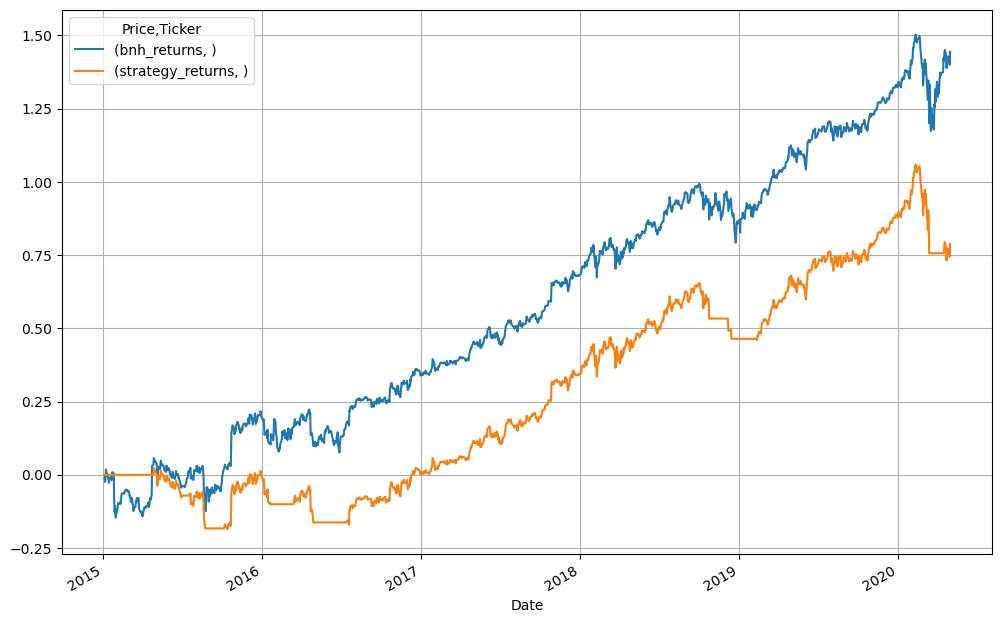

In [9]:
# comparing buy & hold strategy / bollinger bands strategy returns
print("Buy and hold returns:",df['bnh_returns'].cumsum()[-1])
print("Strategy returns:",df['strategy_returns'].cumsum()[-1])

# plotting strategy historical performance over time
df[['bnh_returns','strategy_returns']] = df[['bnh_returns','strategy_returns']].cumsum()
df[['bnh_returns','strategy_returns']].plot(grid=True, figsize=(12, 8))

C:\Users\DEEL\anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
C:\Users\DEEL\anaconda3\lib\site-packages\pyfolio\plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2015-01-02
End date,2020-04-29
Total months,63
,Backtest
Annual return,13.6%
Cumulative returns,96.7%
Annual volatility,20.5%
Sharpe ratio,0.73
Calmar ratio,0.46
Stability,0.87
Max drawdown,-29.5%


C:\Users\DEEL\anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


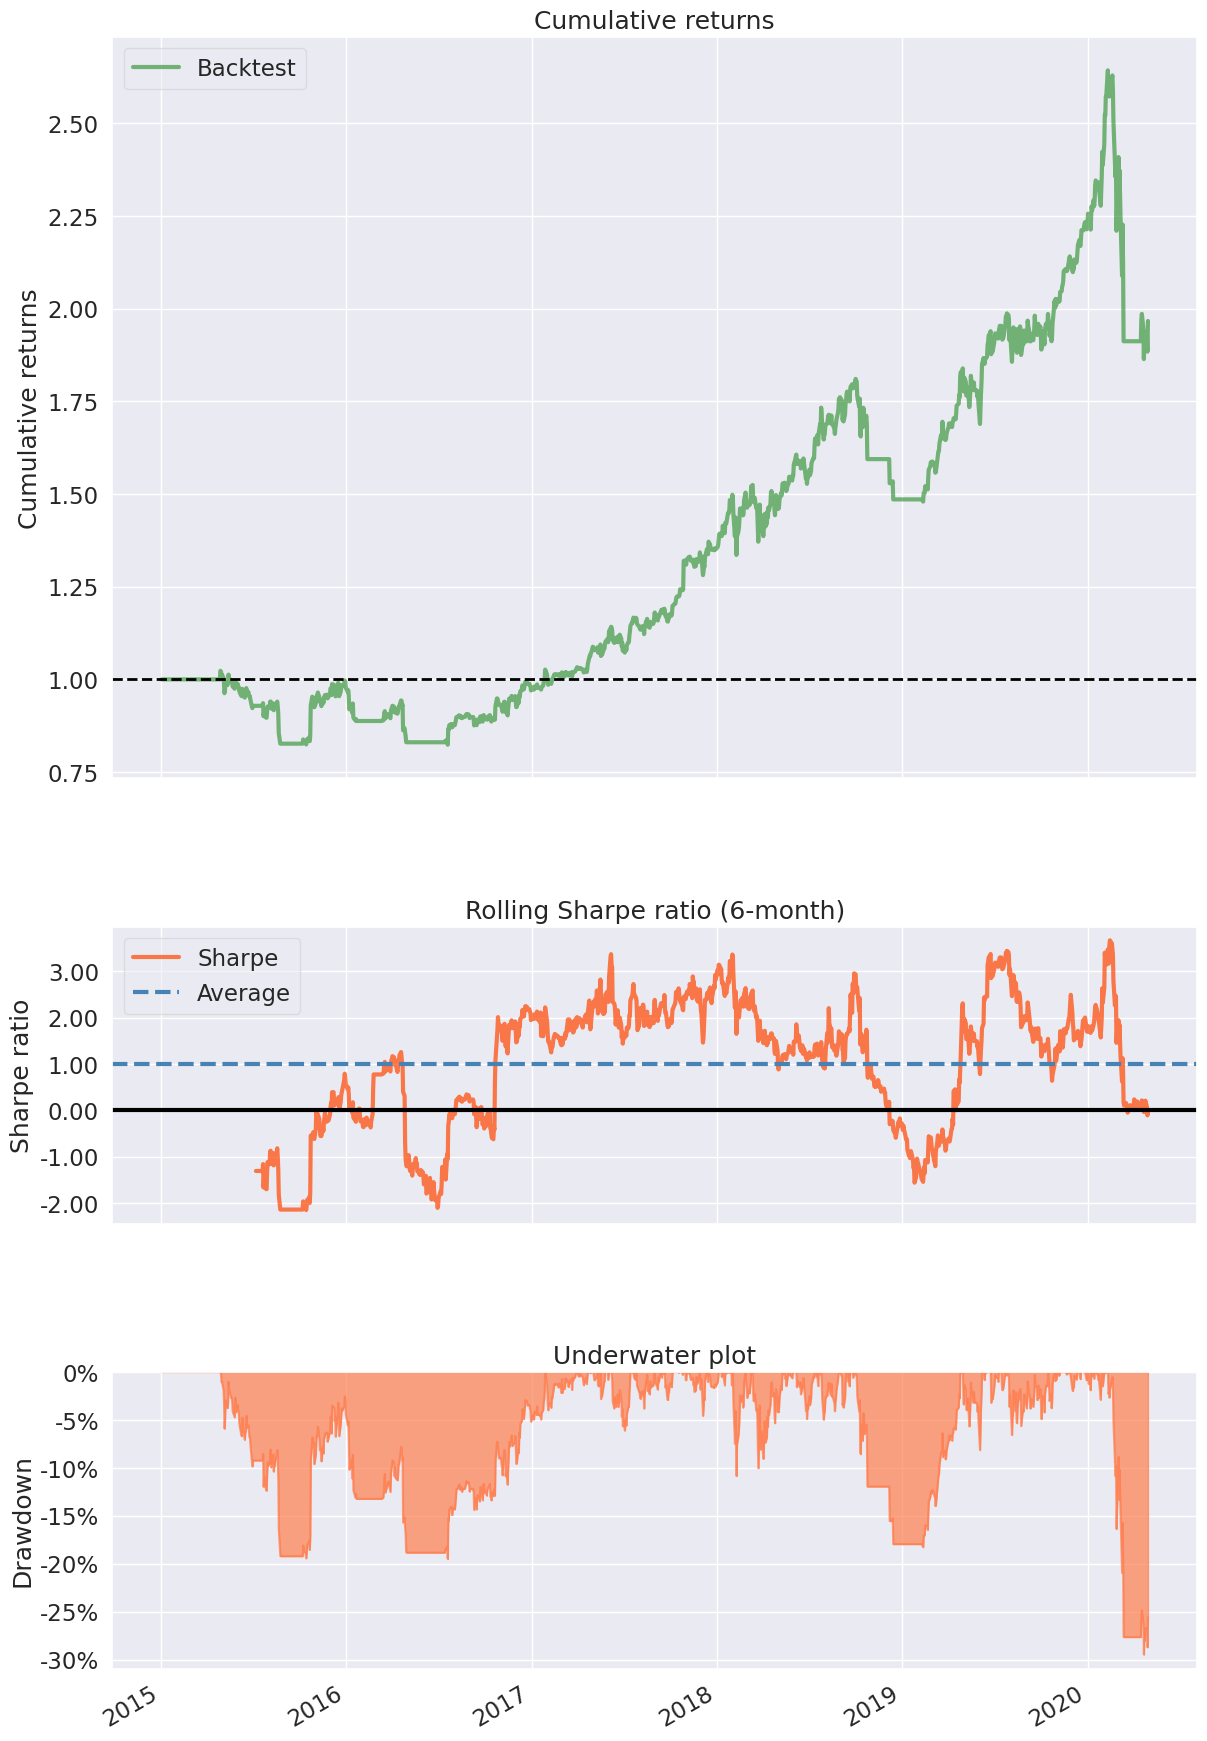

In [10]:
pf.create_simple_tear_sheet(df['strategy_returns'].diff())


The results from pyfolio are self-explanatory.

The ‘EMA’ strategy on the historical data did not perform better than the buy & hold strategy. The cumulative daily returns for buy and hold accounts for 1.44 times the initial investment and the EMA strategy returns account for 0.78 times the initial investment.

For obvious reasons, one should not take a strategy live, even if it gives great returns on back-testing. There are various risks involved such as not accounting for transaction costs and momentum in stock price.

The performance of a strategy can also be optimized by checking the returns on various strategy parameters.